In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data
import random
import train
import json

Loading existing model
Loading existing model
Loading existing model
Loading existing model
Loading existing model


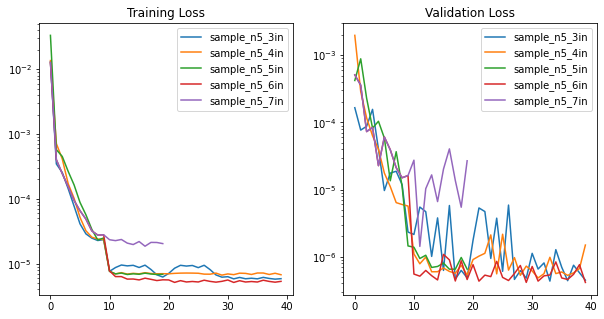

In [2]:
model_ids=[
            #'sample_n5_1in',
            #'sample_n5_2in',
            'sample_n5_3in',
            'sample_n5_4in',
            'sample_n5_5in',
            'sample_n5_6in',
            'sample_n5_7in',
          ]

# fig,ax = plt.subplots(1,1,figsize=(5,5))
# ax.plot(tl[0:], label='Train')
# ax.plot(vl[0:], label='Validation')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss")
ax2.set_title("Validation Loss")
    
for model_id in model_ids:
    with open(f'data/{model_id}.cfg') as f:
        configurations = json.load(f)

    model, mean_losses = train.load_model_only(configurations)

    tl, vl = zip(*mean_losses)

    ax1.plot(tl[:40], label=model_id)
    ax2.plot(vl[:40], label=model_id)

# ax1.set_ylim(0,0.02)
# ax2.set_ylim(0,0.02)
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.legend()
ax2.legend()
plt.show()

In [3]:
list(zip(range(1,len(tl)+1),tl,vl))

[(1, 0.012726569460701265, 0.0005109540128614753),
 (2, 0.0004029567457915837, 0.00035902998788515104),
 (3, 0.0002457159993343338, 7.294381630345015e-05),
 (4, 0.0001544450872210634, 8.420876947639045e-05),
 (5, 9.450874240024674e-05, 2.269954543407948e-05),
 (6, 6.565604653237991e-05, 6.069181348493658e-05),
 (7, 4.876531635839328e-05, 3.9132585061452116e-05),
 (8, 3.20724710727045e-05, 2.117719168381882e-05),
 (9, 2.7619581764127396e-05, 1.4977432147134096e-05),
 (10, 2.787858540985243e-05, 1.6166629484359875e-05),
 (11, 2.340506135448914e-05, 2.7378448362469498e-05),
 (12, 2.2668925559175384e-05, 1.4222445514633364e-06),
 (13, 2.3619858857718003e-05, 1.030770400802794e-05),
 (14, 2.0752935983851707e-05, 1.6533089251424826e-05),
 (15, 1.9725270943497315e-05, 6.61500316425645e-06),
 (16, 2.1942069014271692e-05, 2.0164044599368935e-05),
 (17, 1.859519004674976e-05, 4.0365543281950525e-05),
 (18, 2.1288320921869923e-05, 1.3655546104018867e-05),
 (19, 2.1227919900519157e-05, 5.451840291

Loading existing model
Loading existing model
Loading existing model


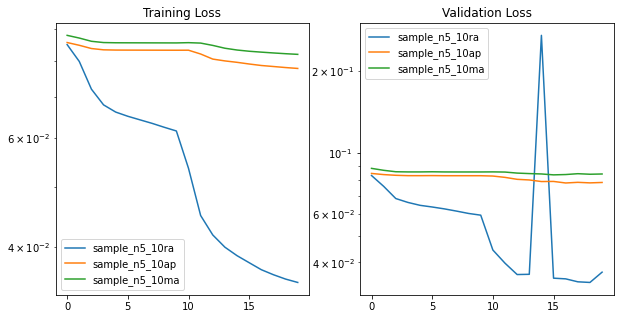

In [25]:
y_cols = {'sample_n5_10ra' : 'RA_OF_ASC_NODE',
          'sample_n5_10ap' : 'ARG_OF_PERICENTER',
          'sample_n5_10in' : 'INCLINATION',
          'sample_n5_10mm' : 'MEAN_MOTION',
          'sample_n5_10ec' : 'ECCENTRICITY',
          'sample_n5_10ma' : 'MEAN_ANOMALY',
         }
# fig,ax = plt.subplots(1,1,figsize=(5,5))
# ax.plot(tl[0:], label='Train')
# ax.plot(vl[0:], label='Validation')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss")
ax2.set_title("Validation Loss")
    
for model_id in y_cols.keys():
    try:
        with open(f'data/{model_id}.cfg') as f:
            configurations = json.load(f)
    except:
        continue

    model, mean_losses = train.load_model_only(configurations)

    tl, vl = zip(*mean_losses)

    ax1.plot(tl[:40], label=model_id)
    ax2.plot(vl[:40], label=model_id)

# ax1.set_ylim(0,0.02)
# ax2.set_ylim(0,0.02)
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.legend()
ax2.legend()
plt.show()

In [22]:

# y_cols = {'sample_n5_3in_bak' : 'RA_OF_ASC_NODE',
#          }

# for model_id, y_col in y_cols.items():
#     src_file = f'./data/{model_id}.pth '
#     dst_file = f'./data/{model_id}_LOOKATME.pth'
#     #cmd = f'copy {src_file} {dst_file}'
#     cmd = 'dir'
#     !{cmd}

 Volume in drive D is DATA
 Volume Serial Number is 4045-DBB1

 Directory of D:\GitHub\tle-prediction\models\model_n5

05/26/2021  10:30 PM    <DIR>          .
05/26/2021  10:30 PM    <DIR>          ..
05/03/2021  05:37 PM                 8 .gitignore
05/19/2021  11:47 AM    <DIR>          .ipynb_checkpoints
05/19/2021  11:48 AM             4,367 auto_lr_adjuster.ipynb
05/08/2021  03:54 PM            17,074 clean_data.py
05/26/2021  09:51 PM    <DIR>          data
04/30/2021  03:49 PM               808 dataset.py
05/26/2021  10:30 PM           123,568 local_model_train.ipynb
05/26/2021  10:29 PM           505,512 local_model_validate.ipynb
05/19/2021  11:33 PM             4,998 model.py
05/13/2021  11:38 PM            66,543 playground_remote1.ipynb
05/13/2021  11:38 PM           585,498 remote_model_validate.ipynb
05/19/2021  11:43 PM             8,954 train.py
05/19/2021  11:43 PM    <DIR>          __pycache__
              10 File(s)      1,317,330 bytes
               5 Dir(s)  687

NameError: name 'X_train_10839' is not defined

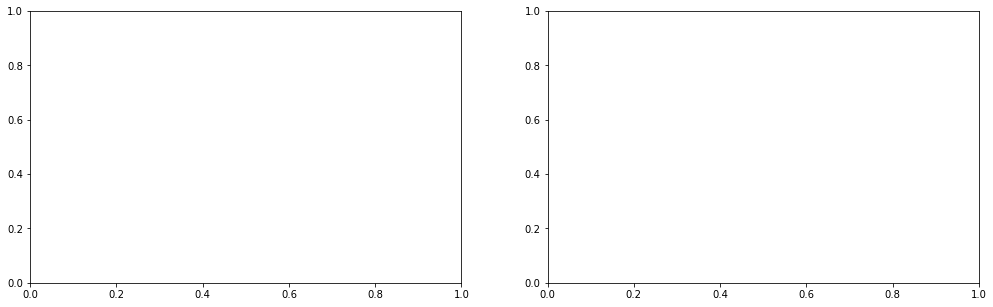

In [4]:
# fig, axs = plt.subplots(1,2,figsize=(17,5))

# # y_train_10839 = y_train.loc[X_train_10839_idx]
# y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
# y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[0])

# results = train.predict(model, X_train_10839[cols], y_train_10839[graph_cols], device=configurations['device'])
# y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
# y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
# y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[1])

# axs[0].set_title('y_train')
# axs[1].set_title('y_predict')
# plt.show()

Loading existing model
Loading existing model
Loading existing model
Loading existing model
Loading existing model
Loading existing model


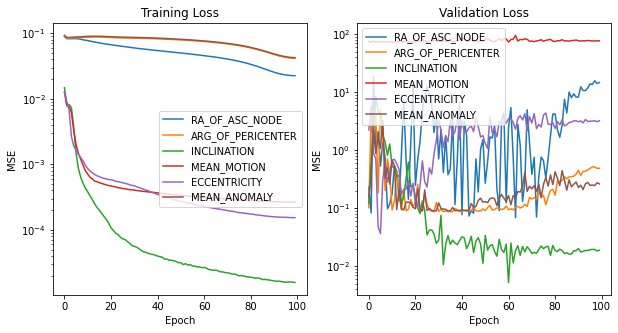

In [10]:
y_cols = {
          'sample_n5_1ra' : 'RA_OF_ASC_NODE',
          'sample_n5_1ap' : 'ARG_OF_PERICENTER',
          'sample_n5_1in' : 'INCLINATION',
#           'sample_n5_3in' : 'INCLINATION',
#           'sample_n5_4in' : 'INCLINATION',
          'sample_n5_1mm' : 'MEAN_MOTION',
          'sample_n5_1ec' : 'ECCENTRICITY',
          'sample_n5_1ma' : 'MEAN_ANOMALY',
         }

single_column_results = {}

for i, (model_id, y_col) in enumerate(y_cols.items()):
    graph_cols = [y_col]
    
#     y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
#     y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,0])

    try:
        with open(f'data/{model_id}.cfg') as f:
            configurations = json.load(f)
            model, mean_losses = train.load_model_only(configurations)
            
            single_column_results[model_id] = (y_col, model, mean_losses)
    except:
        continue

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss")
ax2.set_title("Validation Loss")

for i, (name, (y_col, _, mean_losses)) in enumerate(single_column_results.items()):
    tl, vl = zip(*mean_losses)
    ax1.plot(tl, label=y_col)
    ax2.plot(vl, label=y_col)
    
# ax1.set_ylim(0,0.05)
# ax2.set_ylim(0.0,0.05)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.legend()
ax2.legend()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MSE')
plt.show()

Loading existing model
Loading existing model
Loading existing model
Loading existing model
Loading existing model
Loading existing model
Loading existing model


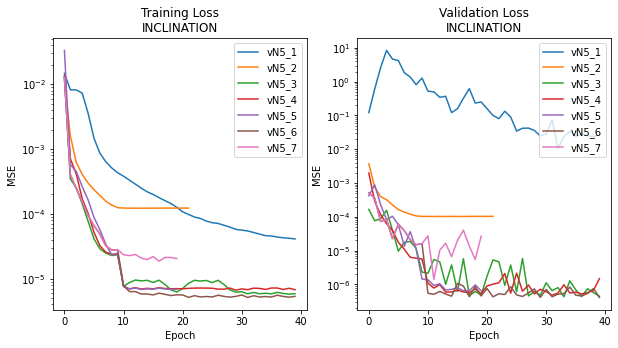

In [17]:
y_cols = {
          'sample_n5_1in' : 'INCLINATION',
          'sample_n5_2in' : 'INCLINATION',
          'sample_n5_3in' : 'INCLINATION',
          'sample_n5_4in' : 'INCLINATION',
          'sample_n5_5in' : 'INCLINATION',
          'sample_n5_6in' : 'INCLINATION',
          'sample_n5_7in' : 'INCLINATION',
         }

single_column_results = {}

for i, (model_id, y_col) in enumerate(y_cols.items()):
    graph_cols = [y_col]
    
    #y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
    #y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,0])

    try:
        with open(f'data/{model_id}.cfg') as f:
            configurations = json.load(f)
            model, mean_losses = train.load_model_only(configurations)
            
            single_column_results[model_id] = (y_col, model, mean_losses)
    except:
        continue

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss\nINCLINATION")
ax2.set_title("Validation Loss\nINCLINATION")

for i, (name, (y_col, _, mean_losses)) in enumerate(single_column_results.items()):
    tl, vl = zip(*mean_losses)
    name='vN5_'+str(i+1)
    ax1.plot(tl[:40], label=name)
    ax2.plot(vl[:40], label=name)
    
# ax1.set_ylim(0,0.05)
# ax2.set_ylim(0.0,0.05)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MSE')
ax1.legend()
ax2.legend()
plt.show()

In [19]:
model_id = 'sample_n5_6in'
with open(f'data/{model_id}.cfg') as f:
    configurations = json.load(f)
    model, mean_losses = train.load_model_only(configurations)

Loading existing model


In [20]:
mean_losses

[(0.012726569460701265, 0.0005109540128614753),
 (0.0004029567457915837, 0.00035902998788515104),
 (0.0002457159993343338, 7.294381630345015e-05),
 (0.0001544450872210634, 8.420876947639045e-05),
 (9.450874240024674e-05, 2.269954543407948e-05),
 (6.565604653237991e-05, 6.069181348493658e-05),
 (4.876531635839328e-05, 3.9132585061452116e-05),
 (3.20724710727045e-05, 2.117719168381882e-05),
 (2.7619581764127396e-05, 1.4977432147134096e-05),
 (2.787858540985243e-05, 1.6166629484359875e-05),
 (7.743726411337591e-06, 5.505994003840442e-07),
 (6.313388378439433e-06, 5.120945921532894e-07),
 (6.315249063599252e-06, 6.233555559731485e-07),
 (5.775373422342851e-06, 5.208167216608217e-07),
 (5.795183979971044e-06, 4.4987642855431886e-07),
 (5.610731689176264e-06, 1.081905287492191e-06),
 (5.968247100976543e-06, 8.953821314605648e-07),
 (5.72900282345647e-06, 4.3426016276271185e-07),
 (5.484808931921011e-06, 8.687922004924076e-07),
 (5.6324366386336075e-06, 4.5632603882239666e-07),
 (5.6057528280

In [281]:
cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION', 'SUNSPOTS_1D',
       'SUNSPOTS_3D', 'SUNSPOTS_7D', 'AIR_MONTH_AVG_TEMP',
       'WATER_MONTH_AVG_TEMP', 'year', 'month_sin', 'month_cos', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos',
       'ms_sin', 'ms_cos', 'year_y', 'month_sin_y', 'month_cos_y',
       'hour_sin_y', 'hour_cos_y', 'minute_sin_y', 'minute_cos_y',
       'second_sin_y', 'second_cos_y', 'ms_sin_y', 'ms_cos_y',
       'epoch_day_diff', 'epoch_sec_diff', 'epoch_ms_diff']
graph_cols = ['INCLINATION','RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']

X_train_10839 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_train_10839.pkl')
y_train_10839 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_train_10839.pkl')
X_test_27944 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test_27944.pkl')
y_test_27944 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test_27944.pkl')

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

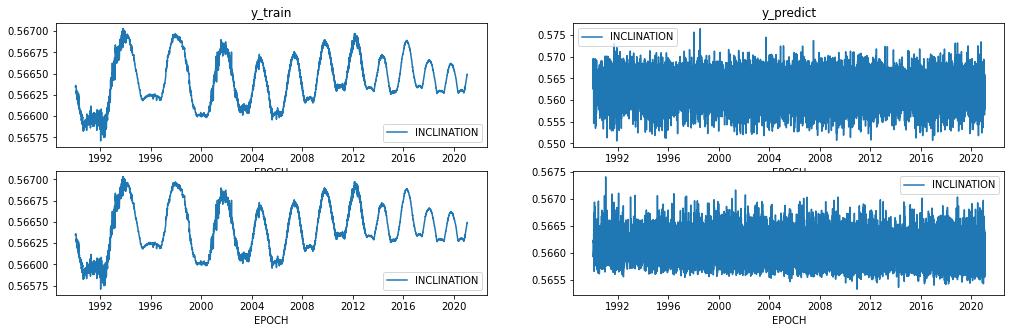

In [292]:
ycol_ra = ['RA_OF_ASC_NODE']
ycol_ap = ['ARG_OF_PERICENTER']
ycol_in = ['INCLINATION']
ycol_mm = ['MEAN_MOTION']
ycol_ec = ['ECCENTRICITY']
ycol_ma = ['MEAN_ANOMALY']

graph_cols = ycol_ra

gc= len(single_column_results)
fig, axs = plt.subplots(gc,2,figsize=(17,gc*2.5))

for i, (name, (y_col, model, _)) in enumerate(single_column_results.items()):
    graph_cols = [y_col]
    
    y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
    y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,0])
        
    results = train.predict(model, X_train_10839[cols], y_train_10839[graph_cols], device=configurations['device'])
    y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
    y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
    y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,1])

axs[0,0].set_title('y_train')
axs[0,1].set_title('y_predict')
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

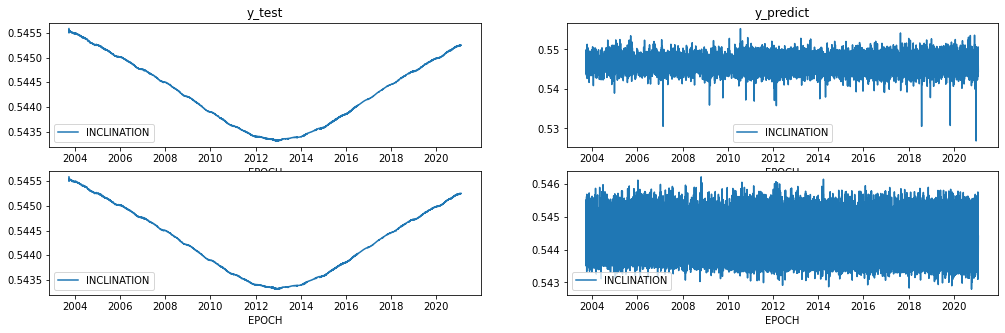

In [293]:
graph_cols = ycol_ra

gc= len(single_column_results)
fig, axs = plt.subplots(gc,2,figsize=(17,gc*2.5))

for i, (name, (y_col, model, _)) in enumerate(single_column_results.items()):
    graph_cols = [y_col]
    
    y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
    y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,0])
        
    results = train.predict(model, X_test_27944[cols], y_test_27944[graph_cols], device=configurations['device'])
    y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
    y_pred_10839['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
    y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()

ValueError: The number of passed axes must be 1, the same as the output plot

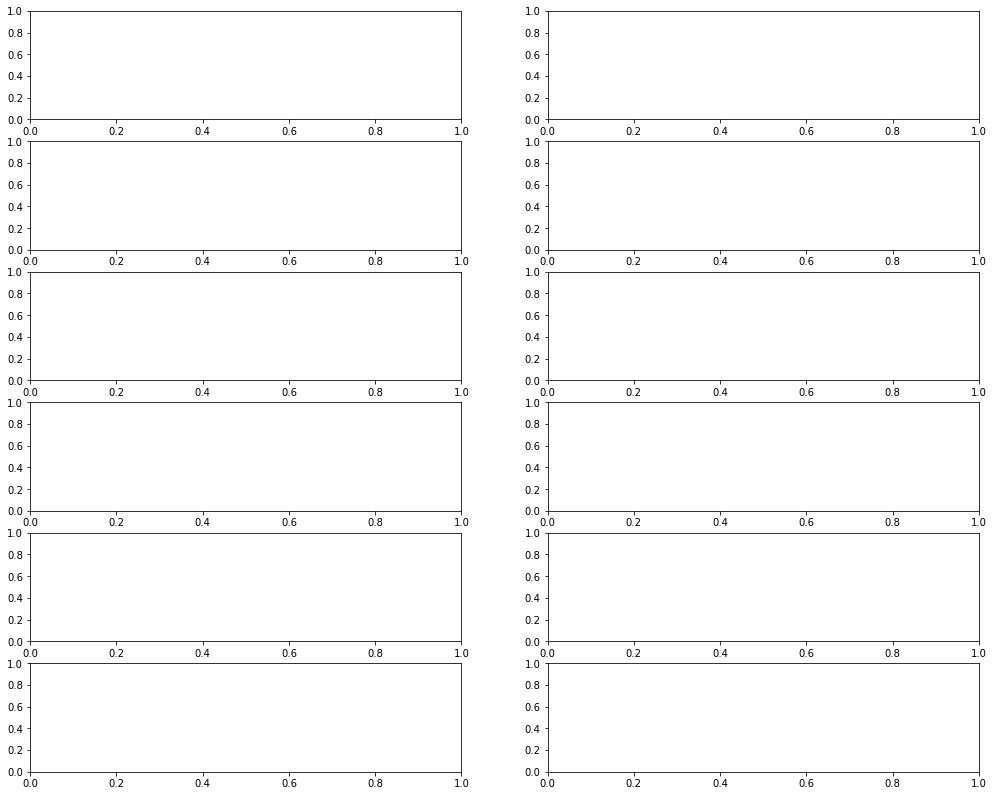

In [294]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

# y_test_27944 = y_test.loc[X_test_27944_idx]
y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_test_27944[cols], y_test_27944[y_train_10839.columns[:-1]], device=configurations['device'])
y_pred_27944 = pd.DataFrame(results, columns=graph_cols)
y_pred_27944['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
y_pred_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()